# Assignment week 5
The assignment of this week is to write a script that processes categorical raster data by reclassifying this and by aggregating the resolution. Specifically, it should be a single script that:
*   First aggregates and then reclassifies.
*   First reclassifies then aggregates.
*   Compares both by means of a histogram indicating the number of pixels in each (aggregated) land cover class. 
The data for this assignment can be found on canvas. Some further explanation is provided in this notebook. 


## Packages
This requires working with rasterio, rioxarray, and rasterstat, which are not installed by default. We are aware that some of the functions required to fulfill this assignment have not been used before. This is on purpose: learning how to work with new packages is one of the explicit learning goals of this course. 

In [ ]:
# Install packages that are not automatically installed in Colab.
!pip install rasterio
!pip install rioxarray
!pip install rasterstats

In [1]:
# Then we import all the packages (the ones that are installed already as well as those we installed specifically for this notebook)
import rasterio
from rasterio.enums import Resampling
import rioxarray
import rasterstats
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
# connect to google drive. Please permit the connection to the Google Drive connected to your VU-account (or your private account, if you want).
from google.colab import drive 
drive.mount ("/content/gdrive")

In [2]:
# Import Data. In this tutorial we will work with a land cover map. This is a categorical map.  

LC_path = "LC_BE/LC_BE.tif"

In [3]:
# As you know by now, the variable LC is only a string that contains a pathname. 
# Open the file using rioxarray:

LC = rioxarray.open_rasterio(LC_path, masked = True)

In [4]:
# Let's check the dimensions and resolution of the data.
print(LC.rio.shape)
print(LC.rio.resolution())

(2433, 2891)
(100.0, -100.0)


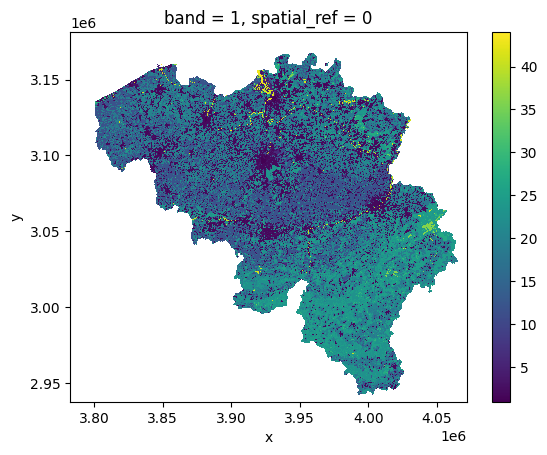

In [5]:
# You could plot the result if you want, I won't go into adjusting the legend, just to see it is Belgium. 
LC = LC.where(LC>0)
LC = LC.where(LC<45)
LC.plot()

As you can see, the resolution is 100 m, and as a result, ther map contains a large number of pixels (> 5 Milion). Working with this map will require a lot of memory, so we would like to decrease this, by increasing the cell size. 
Because it is a categorical map, numerical interpolation techniques (such as bilinear convolution) make no sense (they work, technically, but the result is meaningless). Therefore we will use mode instead. Mode chooses the pixel value that happens most frequently. 
You can find an explanation of all resampling algorithms in the rasterio documentation: https://rasterio.readthedocs.io/en/latest/api/rasterio.enums.html#rasterio.enums.Resampling

The syntax of a resampling is as follows: 

`rescaledRaster = rasterName.rio.reproject(rasterName.rio.crs, resolution= resolutionVariable, resampling=Resampling.mode)`

where `rasterName` is the raster you work with and `resolutionVariable` is a variable with the new resolution 

In [7]:
# This is some example code to show how reproject works

new_resolution = 1000
LC_scaled = LC.rio.reproject(LC.rio.crs, resolution= new_resolution, resampling = Resampling.mode)
print(LC_scaled.rio.shape)
print(LC_scaled.rio.resolution())

(244, 290)
(1000.0, -1000.0)


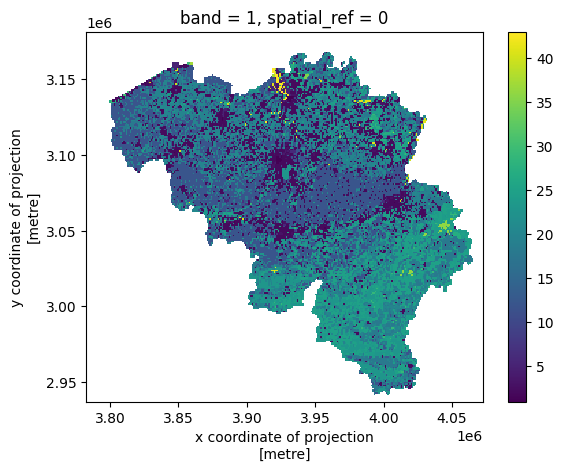

In [8]:
LC_scaled.plot()

## Reclassification
Reclassification of categorical data (and in fact also numerical data) is a rather simple task, conceptually, but it requires a bit of work in a script. It requires the same amount of work in a desktop GIS, but part of that is hidden behind the scenes. 
Since it is a task that you might want to repeat, it is well worth using a function, and declaring variables. We will practice this here. 

## Corine land cover classes
The data set you have worked with here comes from the Corine land cover database (see: https://land.copernicus.eu/pan-european/corine-land-cover), CLC for short. CLC uses a hierarchical classificatiosystem (see the full legend below), but for this study it is ok to use only the coarsest legend, also known as the level-1 legend. 

Full hierarchical legend: https://land.copernicus.eu/user-corner/technical-library/corine-land-cover-nomenclature-guidelines/html/

## Understanding .where
To do a reclass, we use the .where function. The .where reads as follows:

new_raster = raster.where(A, B)

Here, A is the selection of pixels that you want to keep the same, and B is the new value you want to give to the entries that fall outside of this selection A (this part is optional, but it is the part we use here for reclassificying these pixels). 

In [9]:
# This is an example of a reclassification. We use just two classes, so land use is either built-up or it is not, which means it is other.  
# in response to the question in todays lecture: indeed, the example was ncorrect, and here it works correctly. You can check that from the map you can plot below

# first we declare variables
built_up = 1
other = 2

# and here we do the actual reclass
rec = LC.where((LC<1) | (LC>12), built_up) # note that | is a logical OR
rec = rec.where((LC>1) & (LC<12), other) # here a logical AND is appropriate. Note also the difference nthe raster referred to
rec = rec.where(LC>0) # Masking potential no data values

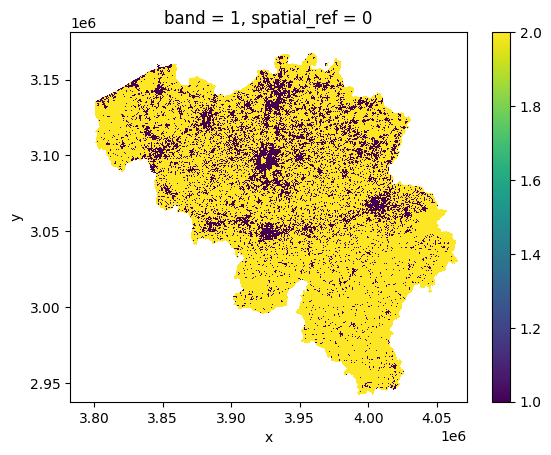

In [10]:
# let's have a loko at the result. It should have two classes only (1 for urban and 2 for non urban), and the no-data should not be shown (i.e. land cover outside Belgium)
rec.plot()

Note that this script contains a few lines of example code that are meant for you to see how things work. Please remove all examples before submitting. It is important to eventually produce clean code, whitout unused or unnecessary lines! This holds for text as well as Python code, and for this assignment as well as the final assignment.

## Exercise: Aggregation and Reclassification

Now I will take the scaled raster and reclassify it. I will call this raster LC_scaled1. I will then do the other way around, first reclassify and then scale it. I will call this raster LC_scaled2

In [16]:
LC_scaled.rio.resolution()
LC_scaled.rio.shape

(244, 290)

In [19]:
built_up = 1
other = 2

LC_scaled1 = LC_scaled.where((LC_scaled<1) | (LC_scaled>12), built_up) # note that | is a logical OR
LC_scaled1 = LC_scaled1.where((LC_scaled>1) & (LC_scaled<12), other) # here a logical AND is appropriate. Note also the difference nthe raster referred to
LC_scaled1 = LC_scaled1.where(LC_scaled>0) # Masking potential no data values

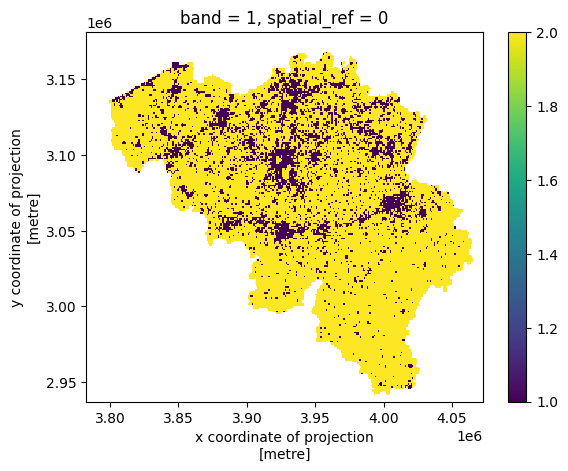

In [20]:
LC_scaled1.plot()

In [21]:

LC_2 = LC.where((LC<1) | (LC>12), built_up) # note that | is a logical OR
LC_2 = LC_2.where((LC>1) & (LC<12), other) # here a logical AND is appropriate. Note also the difference nthe raster referred to
LC_2 = LC_2.where(LC>0) # Masking potential no data values

In [22]:
LC_scaled2 = LC_2.rio.reproject(LC_2.rio.crs, resolution= new_resolution, resampling = Resampling.mode)
print(LC_scaled2.rio.shape)
print(LC_scaled2.rio.resolution())

(244, 290)
(1000.0, -1000.0)


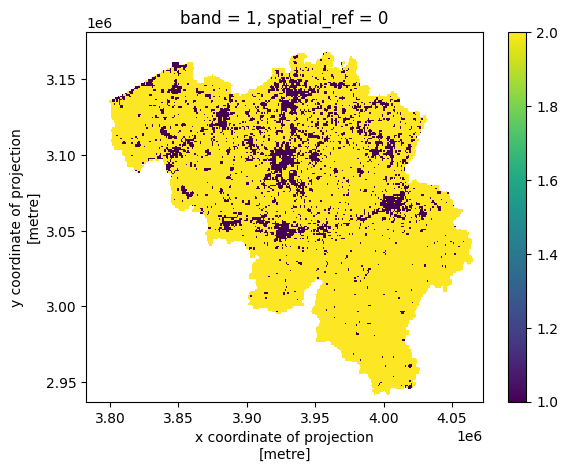

In [23]:
LC_scaled2.plot()

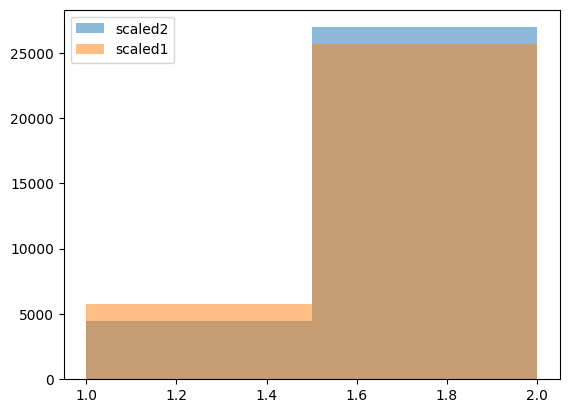

In [26]:
plt.hist(LC_scaled2.values.flatten(), bins = 2, alpha = 0.5, label = 'scaled2')
plt.hist(LC_scaled1.values.flatten(), bins = 2, alpha = 0.5, label = 'scaled1')
plt.legend(loc='upper left')
plt.show()